In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [3]:
ds_fcn_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data//fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era

<xarray.Dataset>
Dimensions:      (phony_dim_3: 21, phony_dim_0: 21, phony_dim_1: 51,
                  phony_dim_2: 57, phony_dim_4: 220, phony_dim_5: 480)
Coordinates:
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 0
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
  * phony_dim_2  (phony_dim_2) int64 0 1 2 3 4 5 6 7 ... 49 50 51 52 53 54 55 56
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479
Data variables:
    forecast     (phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5) float64 ...

In [ ]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_pl\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['z'][:,2,:,:]

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)


In [2]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_pl\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['z'][:,2,:,:]

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)


In [3]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [4]:
ds_fc_era_tcwv = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [12]:
ds_fc_era_tcwv_mean = np.mean(ds_fc_era_tcwv[:,:,31:71,97:137],axis=(2,3))

In [13]:
np.shape(ds_fc_era_tcwv_mean)

(15, 51)

([<matplotlib.axis.XTick at 0x15087eac0a00>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

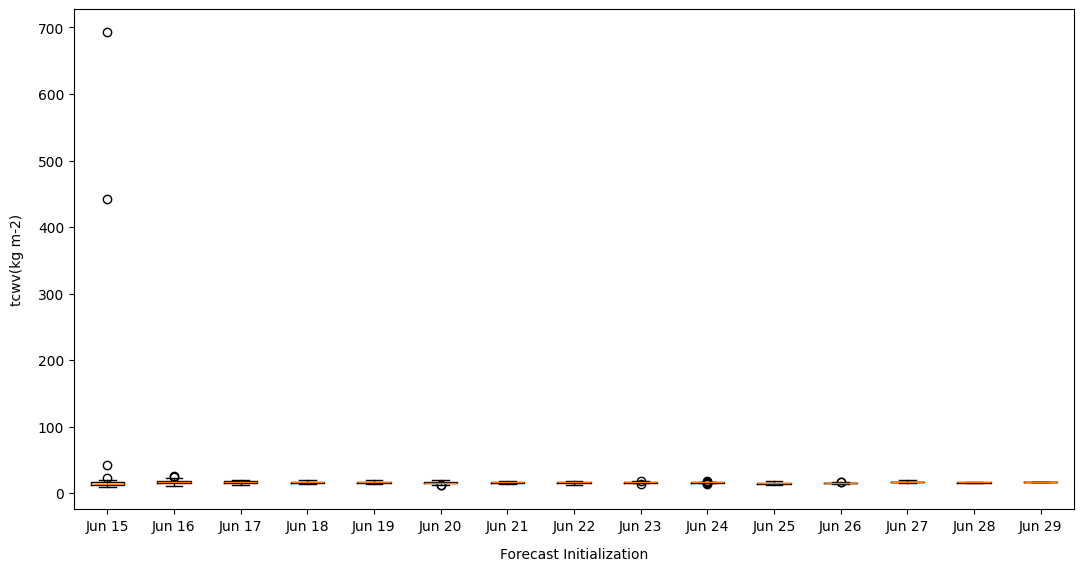

In [15]:
#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("tcwv(kg m-2)", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=ds_fc_era_tcwv_mean[:,1:50].T
ax.boxplot(data)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

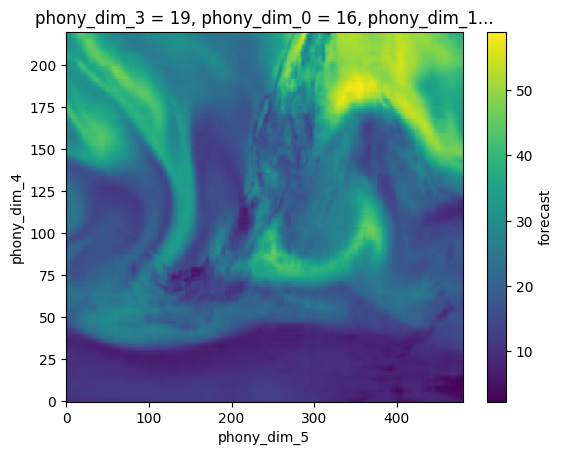

In [19]:
ds_fcn_era.isel(phony_dim_0 = 16, phony_dim_1 = 23, phony_dim_4=slice(None,None,-1),phony_dim_2 = 10,  phony_dim_3 = 19).forecast.plot()

In [40]:
np.min(ds_fc_era_tcwv[0,5,:,:])

<xarray.DataArray 'forecast' ()>
array(-1309.14627539)
Coordinates:
    time         int64 0
    phony_dim_3  int64 19
    phony_dim_0  int64 1
    phony_dim_1  int64 5
    phony_dim_2  int64 56

Text(0, 0.5, 'Latitude')

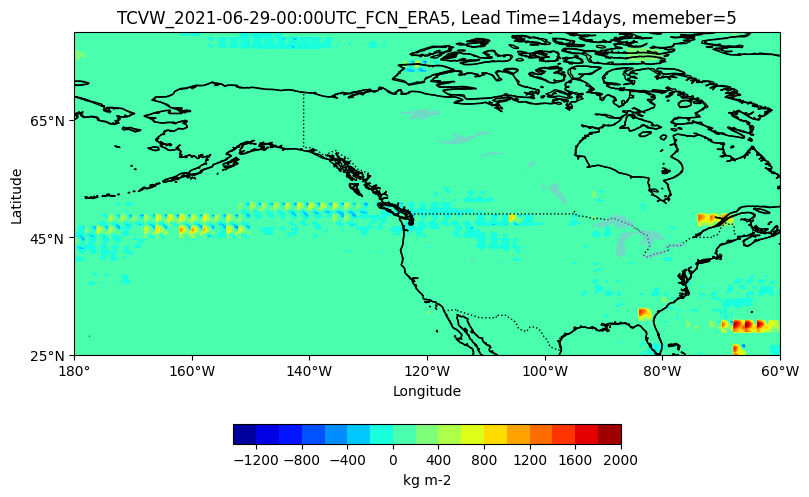

In [41]:

#ERA5 plots

#lat = ds_fcn_21['phony_dim_4']
#lon = ds_fcn_21['phony_dim_5']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)





# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,ds_fc_era_tcwv[0,5,:,:],cmap='jet',levels=20)
    #phony_dim_3: 21phony_dim_0: 21phony_dim_1: 51phony_dim_2: 57phony_dim_4: 220phony_dim_5: 480
#mark the location of lytton
red_point_lon = -121.50
red_point_lat = 50.25

# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='kg m-2',orientation='horizontal',shrink=0.5)


# Set plot title and labels
plt.title('TCVW_2021-06-29-00:00UTC_FCN_ERA5, Lead Time=14days, memeber=5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('T2m_2021-06-15_ERA5.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()